In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from word2number import w2n
from sklearn import linear_model

In [2]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.experience = df.experience.fillna("zero")

In [4]:
df.experience = df.experience.apply(w2n.word_to_num)

In [5]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [6]:
df = df.rename(columns={"test_score(out of 10)": "test_score"})
df

,experience,test_score,interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [7]:
import math
mean_test_score = math.floor(df["test_score"].mean())
mean_test_score

7

In [8]:
df.test_score = df.test_score.fillna(mean_test_score)

In [9]:
df

,experience,test_score,interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


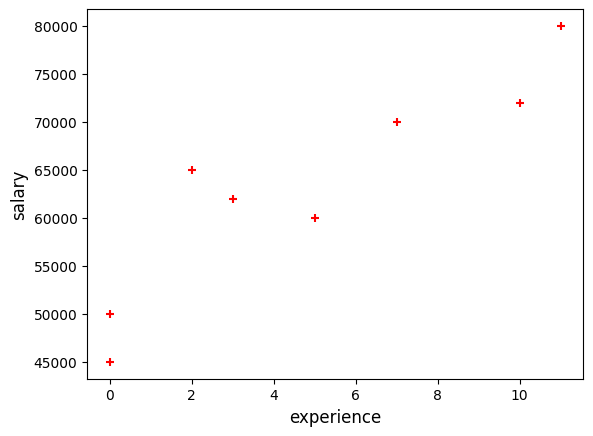

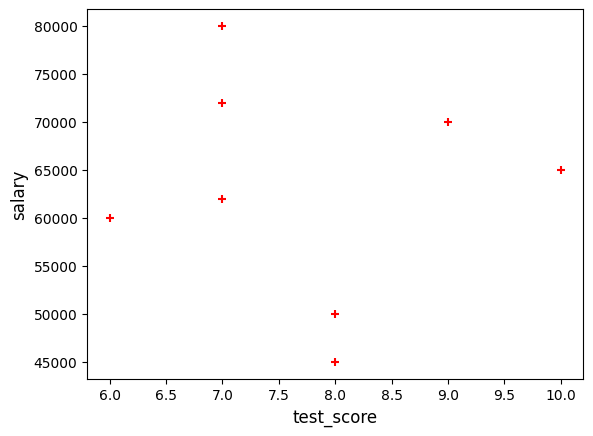

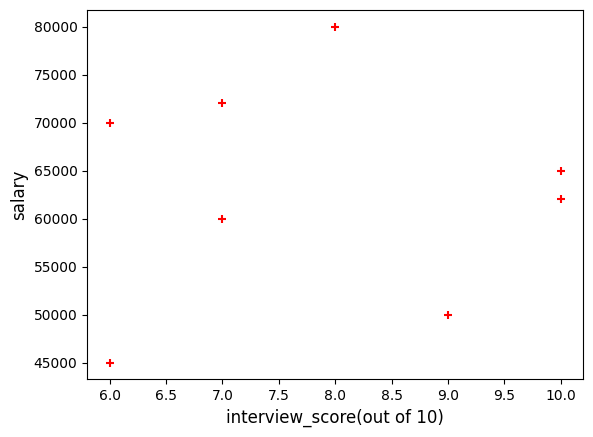

In [10]:
%matplotlib inline
for i in df.columns[:-1]:
    plt.xlabel(i, fontsize=12)
    plt.ylabel("salary", fontsize=12)
    plt.scatter(df[i], df["salary($)"], color="red", marker="+")
    plt.show()

In [11]:
reg = linear_model.LinearRegression()
reg.fit(df[["experience", "test_score", "interview_score(out of 10)"]], df["salary($)"])

LinearRegression()

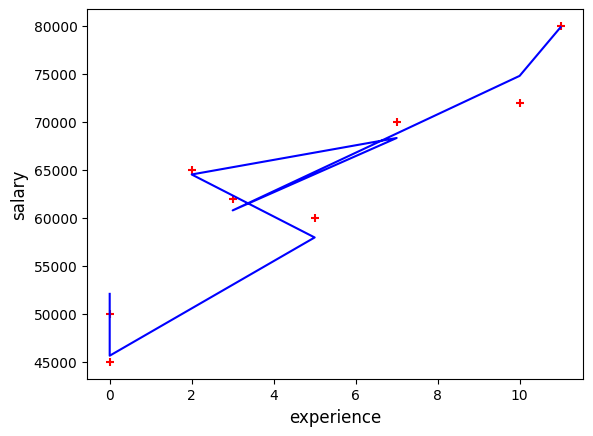

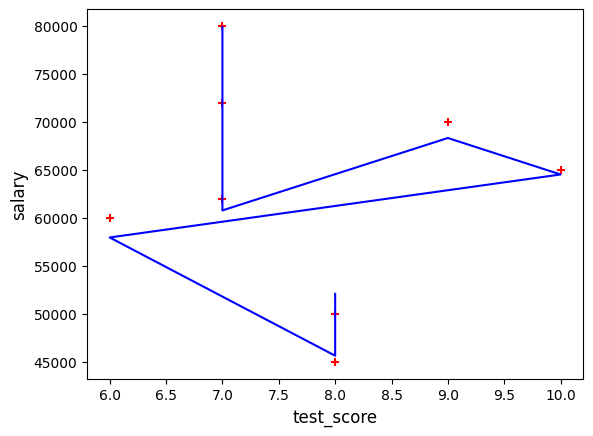

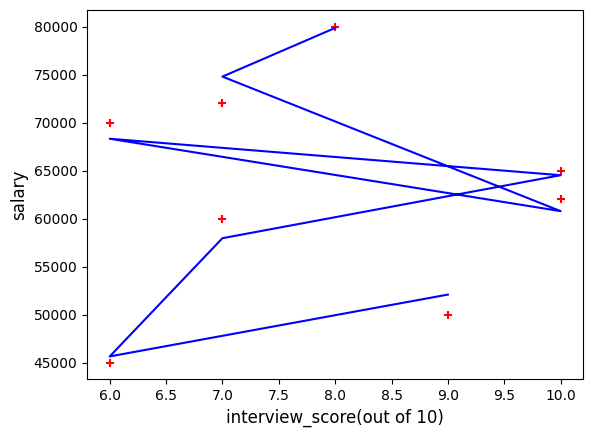

In [12]:
%matplotlib inline
for i in df.columns[:-1]:
    plt.xlabel(i, fontsize=12)
    plt.ylabel("salary", fontsize=12)
    plt.scatter(df[i], df["salary($)"], color="red", marker="+")

    X= df.drop(columns=["salary($)"])
    plt.plot(df[i], reg.predict(X), color="blue")
    plt.show()

In [13]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [14]:
reg.intercept_

np.float64(14992.65144669314)

In [15]:
def salary_predict(experience, test_score, interview_score):
    X_new = pd.DataFrame([[experience, test_score, interview_score]], columns=["experience", "test_score", "interview_score(out of 10)"])
    predict = reg.predict(X_new)
    return predict

In [16]:
salary_predict(2, 9, 6)

array([53713.86677124])

In [17]:
salary_predict(12, 10, 10)

array([93747.79628651])